In [2]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.0 MB/s eta 0:00:00


### **Import The Necceary Library**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

## **Load the data set**

In [6]:
# load the dataset
url = 'StockDataHDFCBANK.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2023-04-03T09:15:00+0530,1607.55,1609.55,1606.00,1606.65,169821
1,1,2023-04-03T09:20:00+0530,1606.55,1607.95,1603.40,1607.25,203608
2,2,2023-04-03T09:25:00+0530,1607.45,1607.65,1604.10,1607.00,164006
3,3,2023-04-03T09:30:00+0530,1607.00,1610.15,1606.70,1609.10,226137
4,4,2023-04-03T09:35:00+0530,1609.40,1610.40,1607.65,1608.25,138182


## **Preprocessing  and Cleaning the Data**


In [7]:
# convert the 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.drop(columns=['Unnamed: 0'], inplace=True)

# display the first few rows of data frame
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-03 09:15:00+05:30,1607.55,1609.55,1606.00,1606.65,169821
2023-04-03 09:20:00+05:30,1606.55,1607.95,1603.40,1607.25,203608
2023-04-03 09:25:00+05:30,1607.45,1607.65,1604.10,1607.00,164006
2023-04-03 09:30:00+05:30,1607.00,1610.15,1606.70,1609.10,226137
2023-04-03 09:35:00+05:30,1609.40,1610.40,1607.65,1608.25,138182


## **Check The Missing Values**

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
              Open         High          Low        Close        Volume
count  1351.000000  1351.000000  1351.000000  1351.000000  1.351000e+03
mean   1667.246891  1668.636751  1665.881384  1667.260104  2.283510e+05
std      17.980614    17.840144    17.988966    17.872282  1.810093e+05
min    1603.800000  1605.300000  1602.750000  1603.850000  0.000000e+00
25%    1661.975000  1663.500000  1660.625000  1661.975000  1.036135e+05
50%    1668.950000  1670.200000  1667.800000  1668.900000  1.756870e+05
75%    1676.950000  1678.100000  1675.950000  1676.950000  3.025700e+05
max    1720.000000  1720.000000  1696.750000  1698.250000  1.963531e+06


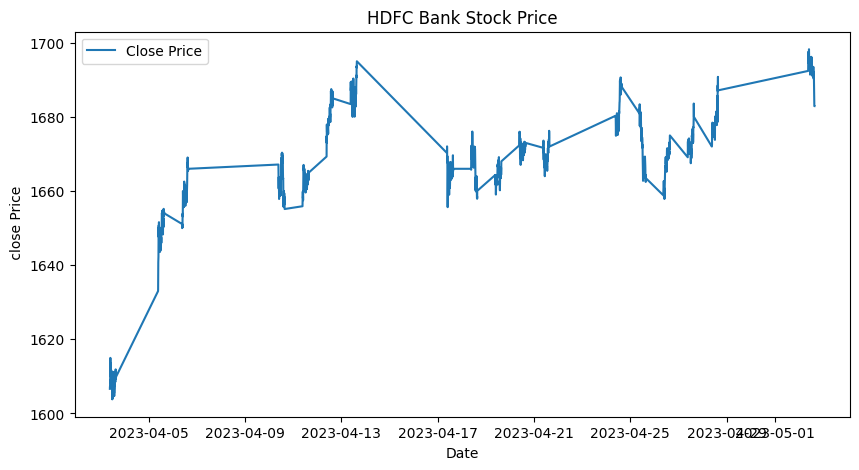

In [8]:
# check for any missing values
print(df.isna().sum())

# display basic statistical details
print(df.describe())

# ploting the closing price to get an initial visualization of the data
plt.figure(figsize=(10, 5))
plt.plot(df['Close'],label='Close Price')
plt.title('HDFC Bank Stock Price')
plt.xlabel('Date')
plt.ylabel(' close Price')
plt.legend()
plt.show()

In [9]:
def find_support_and_resistance(d,window_size=20,horizon=5):
    df['support'] = df['Low'].rolling(window=window_size,center=True).min()
    df['resistance'] = df['High'].rolling(window=window_size,center=True).max()
    return df
df = find_support_and_resistance(df)

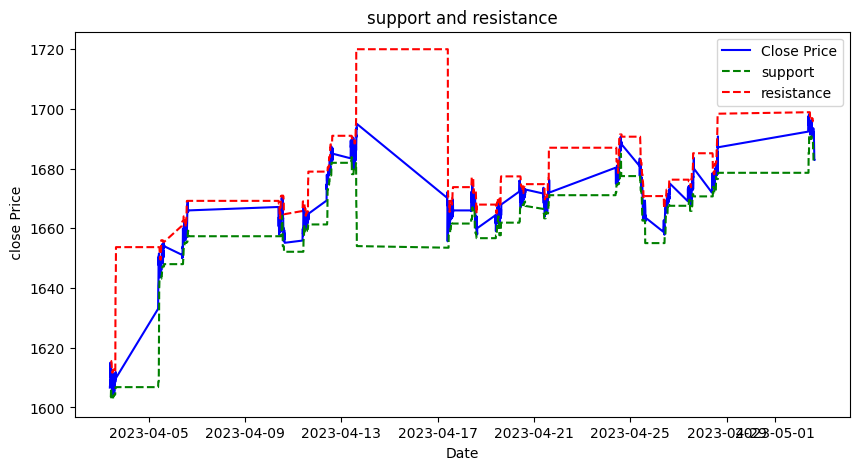

In [10]:
# plot the support and resistance
plt.figure(figsize=(10, 5))
plt.plot(df['Close'],label='Close Price',color='blue')
plt.plot(df['support'],label='support',linestyle='dashed',color='green')
plt.plot(df['resistance'],label='resistance',linestyle='dashed',color='red')
plt.title('support and resistance')
plt.xlabel('Date')
plt.ylabel(' close Price')
plt.legend()
plt.show()

# **Plot the Trendline**

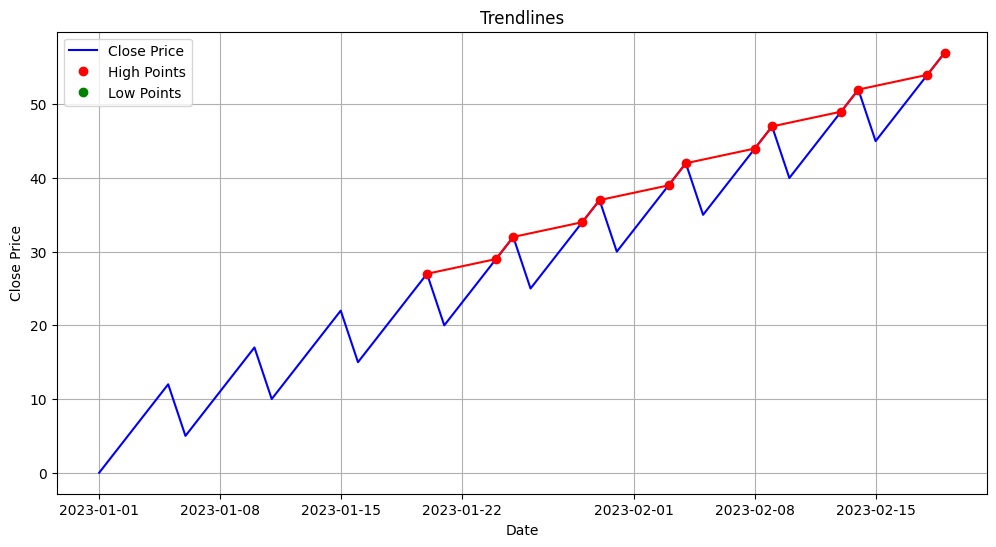

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_trendlines(df):
    """
    Function to plot trendlines on the closing price.
    :param df: DataFrame with stock data
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Price', color='blue')


    # Calculate rolling maximum and minimum
    high_points = df[df['Close'] == df['Close'].rolling(window=20).max()]
    low_points = df[df['Close']== df['Close'].rolling(window = 20).min()]



    # Plot High Points
    plt.plot(high_points.index, high_points['Close'], marker='o', linestyle='None', color='red', label='High Points')
    plt.plot(low_points.index, low_points['Close'], marker='o', linestyle='None', color='green', label='Low Points')



     # Draw trendlines
    for i in range(len(high_points) - 1):
            plt.plot([high_points.index[i], high_points.index[i + 1]],
                     [high_points['Close'].iloc[i], high_points['Close'].iloc[i + 1]],
                     color='red')

    # Draw trendlines for low points
    for i in range(len(low_points) - 1):
            plt.plot([low_points.index[i], low_points.index[i + 1]],
                     [low_points['Close'].iloc[i], low_points['Close'].iloc[i + 1]],
                     color='green')

    # Customize the plot
    plt.title('Trendlines')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()



plot_trendlines(df)
